# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
#parsing the data
html = browser.html
#creating the soup
soup = soup(html, 'html.parser')

In [5]:
table = soup.find('table', class_='table')
# print(table.prettify())

In [6]:
#Extract table header
table_header = table.find_all('th')
print(table_header)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]


In [7]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
# print(rows)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [9]:
# Create an empty list
id = []
terrestrial_data = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(mars_df)
    mars_df.loc[length]=row_data

In [10]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
# Change data types 
mars_df['id']=mars_df['id'].astype(int)
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol']=mars_df['sol'].astype(int)
mars_df['ls']=mars_df['ls'].astype(int)
mars_df['month']=mars_df['month'].astype(int)
mars_df['min_temp']=mars_df['min_temp'].astype(float)
mars_df['pressure']=mars_df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
nb_of_months = mars_df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')

There are 12 months on Mars.


In [15]:
# 2. How many Martian days' worth of data are there?
first_day_of_data = mars_df['sol'].min()
last_day_of_data = mars_df['sol'].max()
unique_days_date = mars_df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the dataset.')

There are 1867 Martian days worth of data in the dataset.


In [16]:
# 3. What is the average low temperature by month?
avg_temp = mars_df['min_temp'].mean()
print(f'The average low temperature on Mars is ', avg_temp)

The average low temperature on Mars is  -76.12104981253347


In [17]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp=[]

for i in range(1,nb_of_months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=mars_df.loc[mars_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_nb"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)  
avg_min_temp

[{'month_nb': 1, 'avg_min_temp': -77.0},
 {'month_nb': 2, 'avg_min_temp': -80.0},
 {'month_nb': 3, 'avg_min_temp': -83.0},
 {'month_nb': 4, 'avg_min_temp': -83.0},
 {'month_nb': 5, 'avg_min_temp': -79.0},
 {'month_nb': 6, 'avg_min_temp': -75.0},
 {'month_nb': 7, 'avg_min_temp': -72.0},
 {'month_nb': 8, 'avg_min_temp': -68.0},
 {'month_nb': 9, 'avg_min_temp': -69.0},
 {'month_nb': 10, 'avg_min_temp': -72.0},
 {'month_nb': 11, 'avg_min_temp': -72.0},
 {'month_nb': 12, 'avg_min_temp': -74.0}]

In [18]:
# Grouping DataFrame by the average of temperature for each month
json_mars_temp = json.dumps(avg_min_temp)
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month')

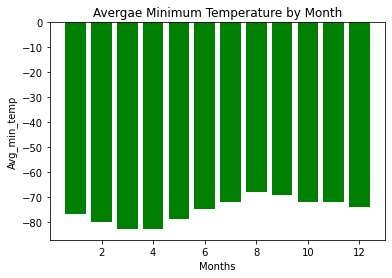

In [19]:
# Plot the average temperature by month
plt.bar(df_month_temp['month_nb'],df_month_temp['avg_min_temp'], color='green')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

In [20]:
# 4. Average pressure by Martian month
avg_pressure=[]

for i in range(1,nb_of_months+1):
    pressure_per_month={"month_nb":"","avg_pressure":""}
    avg_pressure_month=mars_df.loc[mars_df['month']==i]['pressure'].mean()
    round_avg_pressure_month = round(avg_pressure_month,0)
    pressure_per_month["month_nb"] = i
    pressure_per_month["avg_pressure"] = round_avg_pressure_month
    avg_pressure.append(pressure_per_month)  
avg_pressure

[{'month_nb': 1, 'avg_pressure': 862.0},
 {'month_nb': 2, 'avg_pressure': 889.0},
 {'month_nb': 3, 'avg_pressure': 877.0},
 {'month_nb': 4, 'avg_pressure': 806.0},
 {'month_nb': 5, 'avg_pressure': 749.0},
 {'month_nb': 6, 'avg_pressure': 745.0},
 {'month_nb': 7, 'avg_pressure': 795.0},
 {'month_nb': 8, 'avg_pressure': 874.0},
 {'month_nb': 9, 'avg_pressure': 913.0},
 {'month_nb': 10, 'avg_pressure': 887.0},
 {'month_nb': 11, 'avg_pressure': 857.0},
 {'month_nb': 12, 'avg_pressure': 842.0}]

In [21]:
df_by_month=mars_df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Avergae Pressure by Month')

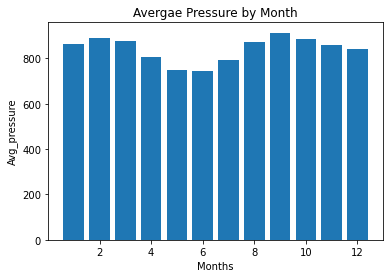

In [22]:
# Plot the average pressure by month
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Avergae Pressure by Month')

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Finding the original Sun longitude
orig_long=mars_df['ls'].loc[0]
orig_long
# Knowing that the Sun longitude will be the same after Approximately 1 Martial year I am going to find the next rows where longitude is equal the orig_long
same_long=mars_df.loc[mars_df['ls']==orig_long]
same_long
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
import json
json_mars_temp = json.dumps(avg_min_temp)
# Save json as df file
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [25]:
browser.quit()